In [1]:
import numpy as np
import pandas as pd

# Extract car2db vehicles

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

cnx = mysql.connector.connect(user='romain', password='Dream.0523',
                              host='localhost',
                              database='truck')
cursor = cnx.cursor()

year = 2015

query_ID = ("SELECT DISTINCT ct.id_car_trim "
         "FROM car_make c "
             "INNER JOIN car_model cm ON cm.id_car_make = c.id_car_make "
             "INNER JOIN car_trim ct ON ct.id_car_model = cm.id_car_model "
             "INNER JOIN car_specification_value csv ON csv.id_car_trim = ct.id_car_trim "
             "INNER JOIN car_specification  cs ON cs.id_car_specification = csv.id_car_specification "
                
        )

cursor.execute(query_ID)
l_ID = [l[0] for l in cursor.fetchall()]

cnx.close()

cnx = mysql.connector.connect(user='romain', password='Dream.0523',
                              host='localhost',
                              database='truck')

cursor = cnx.cursor()

query = ("SELECT ct.id_car_trim, ctype.name, c.name, cm.name, ct.name, cs.name, csv.value "
         "FROM car_make c "
             "INNER JOIN car_type ctype ON ctype.id_car_type = c.id_car_type "
             "INNER JOIN car_model cm ON cm.id_car_make = c.id_car_make "
             "INNER JOIN car_trim ct ON ct.id_car_model = cm.id_car_model "
             "INNER JOIN car_specification_value csv ON csv.id_car_trim = ct.id_car_trim "
             "INNER JOIN car_specification  cs ON cs.id_car_specification = csv.id_car_specification "
        "WHERE  ct.id_car_trim IN (" + ','.join(map(str, l_ID)) + ")"
        )
cursor.execute(query)

df = pd.DataFrame( [[ij for ij in i] for i in cursor.fetchall()])
df.rename(columns={0:'ID', 1:'Type', 2: 'Make name', 3: 'Model name', 4:'Trim', 5:'Spec', 6:'Spec value'}, inplace=True)

cnx.close()

df = df.pivot_table(index=['ID', 'Type', 'Make name', 'Model name', 'Trim'], columns='Spec', values='Spec value', aggfunc='first')
df['Curb weight'] = df['Curb weight'].astype('float64')
df['Curb vehicle weight'] = df['Curb weight'].astype('float64')
df['Engine power'] = df['Engine power'].astype('float64')
df['Useful volume'] = df['Useful volume'].str.extract('(\d+)').astype('float64')

df['Length'] = df['Length'].str.split(pat="-").str[0]
df['Length'] = df['Length'].astype('float64')
df["The length of the car"] = df["The length of the car"].str.extract('(\d+)').astype('float64')

df['Tractor width'] = df['Tractor width'].astype('float64')
df['Height'] = df['Height'].str.split(pat="-").str[0]
df["The height of the car"] = df["The height of the car"].str.extract('(\d+)').astype('float64')
#df['Wheelbase'] = df['Wheelbase'].str.extract('(\d+)').astype('float64')
df['Front track'] = df['Front track'].str.split(pat="/").str[0]
df['Front track'] = df['Front track'].astype('float64')

df['Rear track'] = df['Rear track'].str.split(pat="/").str[0]
df['Rear track'] = df['Rear track'].str.replace(" ","")
df['Rear track'] = df['Rear track'].astype('float64')

df['Payload'] = df['Payload'].str.split(pat="-").str[0]
df['Payload'] = df['Payload'].str.split(pat="(").str[0]
df['Payload'] = df['Payload'].str.split(pat="/").str[0]
df['Payload'] = df['Payload'].astype('float64')

df["The width of the car"] = df["The width of the car"].str.extract('(\d+)').astype('float64')

df["Curb weight of the trailer"] = df["Curb weight of the trailer"].astype('float64')
df["Length of the trailer"] = df["Length of the trailer"].str.split(pat="-").str[0]
df["Length of the trailer"] = df["Length of the trailer"].str.split(pat="+").str[0]
df["Length of the trailer"] = df["Length of the trailer"].str.replace(",",".")
df["Length of the trailer"] = df["Length of the trailer"].astype('float64')

df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="x").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="+").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat=",").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="(").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="or").str[0]
df["Fuel tank capacity"] = df["Fuel tank capacity"].str.split(pat="*").str[1]
df["Fuel tank capacity"] = df["Fuel tank capacity"].astype('float64')

df["The full weight of the bus"] = df["The full weight of the bus"].astype('float64')

df["Gross vehicle weight"] = df["Gross vehicle weight"].str.extract('(\d+)').astype('float64')
df["Gross vehicle weight"] = df["Gross vehicle weight"].astype("float64")
df["Payload"] = df["Payload"].astype("float64")

df['Volume'] = (df['The width of the car'] * df['The width of the car'] * df['The length of the car']) / 1e9

df = df.reset_index()
df.to_excel("trucks_db.xlsx")

# Or load the data from an Excel file, if the SQL db is not accessible

In [14]:
df = pd.read_excel("trucks_db.xlsx")
df_bus = df.loc[df["Type"]=="Buses"]
df_medium = df.loc[df["Type"]=="Medium Trucks"]
df_heavy = df.loc[df["Type"]=="Heavy-Duty Tractors"]

Text(0.5, 1.0, 'Buses')

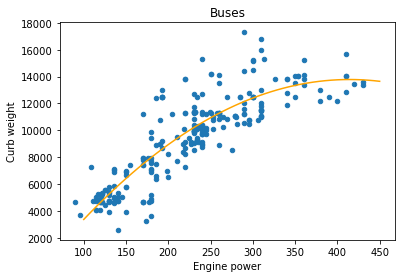

In [15]:
import numpy as np
df_bus.plot("Engine power", "Curb weight", kind="scatter")

ind = df_bus.loc[(~df_bus["Engine power"].isnull())&(~df_bus["Curb weight"].isnull()),"Engine power"]
vals = df_bus.loc[(~df_bus["Engine power"].isnull())&(~df_bus["Curb weight"].isnull()),"Curb weight"]

z = np.polyfit(ind, vals, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(100, 450, 50)
y_new = f(x_new)

plt.plot(x_new, y_new,  linestyle="-", color="orange")
        
plt.title("Buses")

Text(0.5, 1.0, 'Buses: curb weight vs. gross weight')

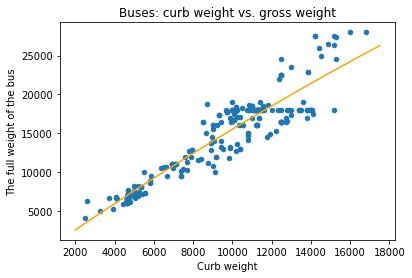

In [17]:
df_bus.plot("Curb weight", "The full weight of the bus", kind="scatter")

ind = df_bus.loc[(~df_bus["The full weight of the bus"].isnull())&(~df_bus["Curb weight"].isnull()),"Curb weight"]
vals = df_bus.loc[(~df_bus["The full weight of the bus"].isnull())&(~df_bus["Curb weight"].isnull()),"The full weight of the bus"]

z = np.polyfit(ind, vals, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(2000, 17500, 50)
y_new = f(x_new)

plt.plot(x_new, y_new,  linestyle="-", color="orange")

plt.title("Buses: curb weight vs. gross weight")

In [22]:
for i,p in zip(df_heavy.count().index,
               df_heavy.count()):
    if p!= 0: print(i,p) 

Unnamed: 0 780
ID 780
Type 780
Make name 780
Model name 780
Trim 780
Amount of gear 406
Angle me to ove. lift, not less 35
Arrangement of cylinders 602
Cab type 547
Compression ratio 75
Diamètre de braquage 44
Drive wheels 559
Engine model 638
Engine power 739
Engine power at rpm 566
Engine type 696
Environmental standard 621
Front brake 107
Front track 51
Fuel 715
Fuel consumption 53
Full trailer weight 76
Gross vehicle weight 286
Ground clearance 57
Height of the tractor 197
If the rpm with rpm 1
Length of the tractor 208
Load on fifth wheel 121
Maximum speed 226
Model transmission 275
Number of cylinders 621
Potencia 644
Pressurization 409
Rear brake 105
Rear track 37
Rims, the dimension 23
The load on the front axle 215
The load on the rear axle (trolley) 190
Torque 602
Torque at rpm 555
Total train weight 225
Tractor width 202
Transmission type 468
Type front suspension 342
Type rear suspension 343
Tyre dimension 276
Wheel arrangement 92
Wheelbase 339


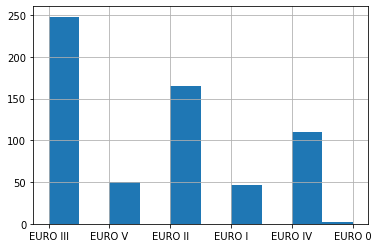

In [21]:
df_heavy["Environmental standard"].hist()

Text(0.5, 1.0, 'Trucks (incl.trailer): Driving mass vs. payload')

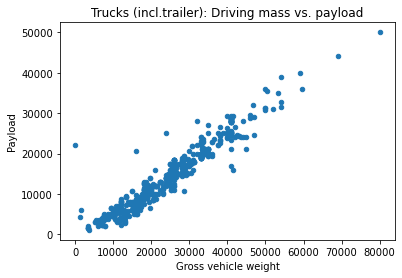

In [24]:
df_medium.plot("Gross vehicle weight", "Payload", kind="scatter")
plt.title("Trucks (incl.trailer): Driving mass vs. payload")

# Trucks

Curb weight

In [35]:
df_medium = df_medium.sort_values('Gross vehicle weight')
bins =  [3000, 4000, 6000, 8000, 15000, 20000, 24000, 28000, 38000, 42000, 55000, 65000]
ind = np.digitize(df_medium['Gross vehicle weight'],bins)

Curb weight = Gross weight - payload

In [36]:
df_medium["Curb weight"] = df_medium["Gross vehicle weight"] - df_medium["Payload"]

Median and quantiles of **curb weight** by gross weight interval (3.5, 7.5, 18, 26, 40 and 60t)

In [38]:
df_medium.groupby(ind)["Curb weight"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,6.0,1970.000000,336.749165,1550.0,1850.00,1925.0,2000.00,2570.0
3,39.0,3650.897436,722.365332,2500.0,3200.00,3510.0,3900.00,5750.0
5,135.0,8259.866667,1776.983150,-4650.0,7820.00,8300.0,9200.00,13050.0
7,114.0,10128.026316,1835.826912,-1000.0,9600.00,10000.0,10800.00,15100.0
9,56.0,14588.482143,2665.561841,10780.0,12900.00,13780.0,15887.50,25500.0
11,2.0,21312.500000,3270.368863,19000.0,20156.25,21312.5,22468.75,23625.0


Power-to-mass ratio

In [39]:
df_medium["power-to-mass ratio"] = ((df_medium["Engine power"]/df_medium["Curb weight"])*1000)

In [41]:
df_medium.groupby(ind)["power-to-mass ratio"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,6.0,62.740523,22.591168,31.128405,50.000000,66.135135,70.270270,96.774194
3,37.0,38.763038,11.464745,21.217391,30.830040,38.157895,42.500000,71.633238
5,134.0,34.671471,12.829842,-49.462366,26.592292,34.683240,43.771980,63.510393
7,111.0,30.401043,35.771151,-330.000000,26.000000,29.411765,39.278351,57.066667
9,56.0,28.372121,4.876363,15.450980,25.000000,28.168024,33.048631,37.847866
11,2.0,21.678920,5.217743,17.989418,19.834169,21.678920,23.523670,25.368421


Frontal area = width * height (we assume a flat front!)

In [42]:
df_medium["frontal area"] = (df_medium["The width of the car"]*df_medium["The height of the car"]) / 1e6

In [44]:
df_medium.groupby(ind)["frontal area"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,8.0,4.427534,0.892136,3.80550,3.905288,4.088088,4.544550,6.48515
3,52.0,5.598084,0.862128,4.14904,4.982588,5.315825,6.449936,7.58740
5,171.0,7.743828,1.025424,5.63500,7.012500,7.509750,8.007000,10.96100
7,117.0,8.048134,0.697277,6.70215,7.750000,7.862500,8.237500,10.00000
9,53.0,8.108979,0.453158,6.86250,7.937500,8.045250,8.440500,8.92500
11,2.0,7.871250,0.047730,7.83750,7.854375,7.871250,7.888125,7.90500


Payload

In [45]:
df_medium.groupby(ind)["Payload"].describe().iloc[[1,3, 5, 7, 9, 11]]

,count,mean,std,min,25%,50%,75%,max
1,6.0,1558.333333,278.238507,1100.0,1500.0,1575.0,1650.0,1950.0
3,39.0,3531.923077,747.184730,2100.0,3000.0,3600.0,4000.0,5000.0
5,135.0,9343.000000,2171.864200,5000.0,8010.0,9400.0,10900.0,20650.0
7,114.0,15443.289474,1983.127595,11000.0,14312.5,15000.0,16400.0,25000.0
9,56.0,25873.303571,2749.396674,15900.0,24600.0,25300.0,28100.0,29400.0
11,2.0,38000.000000,2828.427125,36000.0,37000.0,38000.0,39000.0,40000.0


Fuel tank capacity

In [62]:
df_trucks[["Curb weight of the trailer", "Curb weight", "Curb vehicle weight", ]].sum()

Spec
Curb weight of the trailer    0.0
Curb weight                   0.0
Curb vehicle weight           0.0
dtype: float64

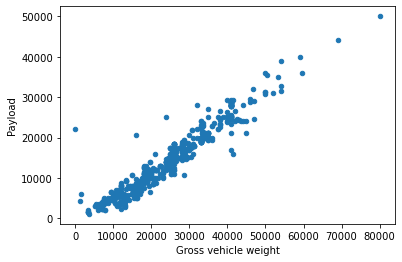

In [64]:
df_trucks.plot("Gross vehicle weight", "Payload", kind="scatter")

In [55]:
list(df.columns)

['ABS',
 'Acceleration time to 60 km/h',
 'Acceleration to 100 km/h',
 'Amount of gear',
 'Angle me to ove. lift, not less',
 'Appointment',
 'Arrangement of cylinders',
 'Back track width',
 'Base',
 'Body type',
 'Cab type',
 'Class bus',
 "Compartments'",
 'Compression ratio',
 'Cross-section',
 'Curb vehicle weight',
 'Curb weight',
 'Curb weight of the trailer',
 'Diamètre de braquage',
 'Door width',
 'Drive wheels',
 'Engine layout',
 'Engine model',
 'Engine power',
 'Engine power at rpm',
 'Engine type',
 'Environmental standard',
 'Front brake',
 'Front overhang',
 'Front track',
 'Fuel',
 'Fuel consumption',
 'Fuel consumption at 60 km/h, l/100 km',
 'Fuel consumption mixed cycle',
 'Fuel tank capacity',
 'Full trailer weight',
 'Gross vehicle weight',
 'Ground clearance',
 'Height',
 'Height of loading platform',
 'Height of the tractor',
 'Height with awning',
 'Height without awning',
 'If the rpm with rpm',
 'Length',
 'Length of cargo area (platform)',
 'Length of loadi

In [56]:
df.loc[~df["Fuel tank capacity"].isnull(), "Fuel tank capacity"]

ID     Type           Make name  Model name  Trim
79922  Medium Trucks  Star       266         266     150.0
Name: Fuel tank capacity, dtype: float64

Text(0.5, 1.0, 'Trucks (incl.trailer): Driving mass vs. engine power')

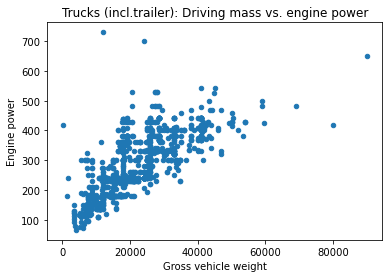

In [12]:
df_trucks.plot("Gross vehicle weight", "Engine power", kind="scatter")
plt.title("Trucks (incl.trailer): Driving mass vs. engine power")

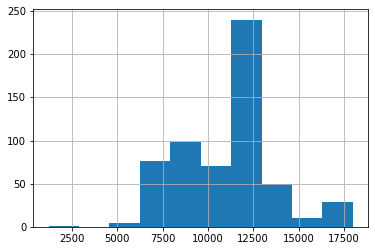

In [156]:
df_2.loc[(df_2["Type"] == "Buses")&(~df_2["Length"].isnull()),'Length'].hist()

In [55]:
len(df.loc[(~df["Curb weight"].isnull())&(~df["Curb vehicle weight"].isnull()),:])

260